In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

In [8]:
from scipy.signal import lti

def synthetic_neuron(drive):
    """
    Simulates a mock neuron with a time step of 1ms.
    Arguments:
    drive - input to the neuron (expect zero mean; SD=1)
    Returns:
    rho - response function (0=non-spike and 1=spike at each time step)
    """
    dt = .001
    T = dt*len(drive)
    time = np.arange(0, T, dt)
    lagSteps = int(.02/dt)
    drive = np.concatenate((np.zeros(lagSteps), drive[lagSteps:]))
    system = scipy.signal.lti([1], [.03**2, 2*.03, 1])
    _, L, _ = scipy.signal.lsim(system, drive[:,np.newaxis], time)
    rate = np.divide(30, 1 + np.exp(50*(.05-L)))
    spikeProb = rate*dt
    return np.random.rand(len(spikeProb)) < spikeProb

In [11]:
def stavg(stim, resp, win=40):
    """get spike-triggered average"""
    spikes = np.where(resp == 1)[0]
    spikes = spikes[spikes >= win]
    inputs = np.zeros((spikes.shape[0], win))

    for s_i in xrange(spikes.shape[0]):
        s_t = spikes[s_i]
        inputs[s_i] = stim[s_t-win:s_t].reshape((win,))

    return np.average(inputs, axis=0)

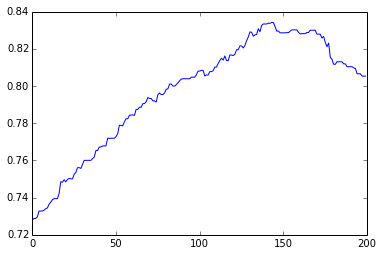

In [122]:
new_noise = np.random.normal(0, 1, size=100*1000)
n_res = synthetic_neuron(white_noise)
in_avg = stavg(white_noise, n_res, win=200)
plt.plot(in_avg)

In [123]:
avg_rate = np.sum(n_res) / float(n_res.shape[0])
kernel = (avg_rate * in_avg)

In [141]:
lin_est = np.convolve(new_noise, kernel, mode='same')

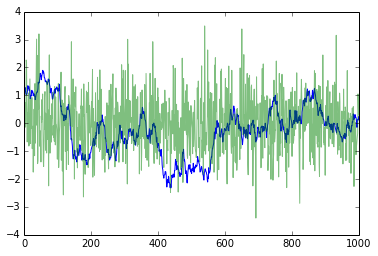

In [142]:
plt.plot(lin_est[:1000]*10, alpha=1)
plt.plot(new_noise[:1000], alpha=0.5)

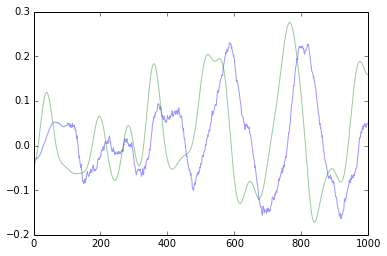

In [109]:
# smoothing experiment
from scipy.ndimage.filters import gaussian_filter1d

def smooth_experiment():
    """In function for scope reasons"""
    col_noise = gaussian_filter1d(new_noise[:1000], sigma=20)
    n_res = synthetic_neuron(col_noise)
    in_avg = stavg(col_noise, n_res, 200)
    avg_rate = np.sum(n_res) / float(n_res.shape[0])
    kernel = (avg_rate * in_avg)
    lin_est = np.convolve(new_noise[:1000], kernel, mode='same')
    plt.plot(lin_est[:1000]*12, alpha=0.4)
    plt.plot(col_noise[:1000], alpha=0.4)

In [26]:
from scipy.optimize import curve_fit

In [48]:
multi_trial_rate = np.zeros((multi_res[0].shape[0]/10, len(multi_res)))
for z_i, m_r in enumerate(multi_res):
    multi_trial_rate[:, z_i] = np.sum(m_r.reshape(-1, 10), axis=1)

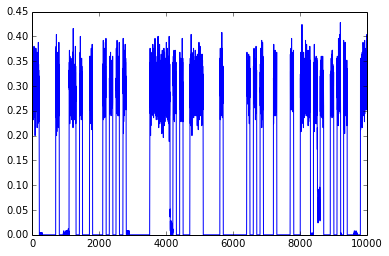

In [119]:
plt.plot(np.mean(multi_trial_rate, axis=1))

In [132]:
print(lin_est.shape)
print(np.mean(multi_trial_rate, axis=1).shape)

(100000,)
()
(10000,)


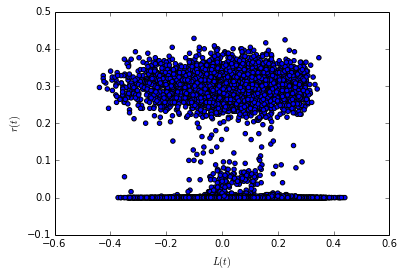

In [145]:
plt.scatter(lin_est[:10000], np.mean(multi_trial_rate, axis=1))
plt.ylabel("$r(t)$")
plt.xlabel("$L(t)$")
plt.savefig("non-lin")